# Web Analytics - Assignment 2

*June 14, 2017*

## Group 1 Members:
* Mauricio Alarcon
* Sekhar Mekala
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh

*The requirements of this assignment are given below:*

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as fromhttps://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

### Approach

In this assignment, we will be creating a graph based on the Super Heros data set available at https://www.kaggle.com/csanhueza/the-marvel-universe-social-network. We will identify the diameter of the graph and the radius of the graph, along with the graph's center nodes. 

Importing all the required packages.

In [2]:
import networkx as net
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## Data
We downloaded the following 3 datasets from  https://www.kaggle.com/csanhueza/the-marvel-universe-social-network.

* nodes.csv - Contains comma separated values of character and the character type. The type of the character can be either *hero* or *comic*.

* edges.csv - Contains comma separated values of the hero's name, and the comic book name.

* hero-network.csv - Contains comma separated values of the hero1 and hero2 who appeared together in a comic.

In this assignment we will be using the file *hero-network.csv* to build the graph of super heroes network based on the Marvel comics.

We will build an undirected graph using the data present in *hero-network.csv* file. It has 2 columns *hero1* and *hero2*. The data in this file represents the superheroes who appeared together in a comic book.

### Reading and cleansing the data
We will read the data into a data frame and perform some sanity checks to make sure that the data is suitable for building a graph.

_Sample records of the hero-network.csv are displayed below:_

In [3]:
#Read the data into a pandas data frame:
ga_edges = pd.read_csv('./data/hero-network.csv')

#print("Sample rows...")
display(ga_edges.head())


,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


_Summary information of the data set is displayed below:_

In [6]:

#print("Summary information of the data is displayed below:")
display(ga_edges.describe())

#print("\nThe above summary confirms that there are no NA values in the data set, \
#\nand CAPTAIN AMERICA has co-appeared most of the times along with other comic characters.")


,hero1,hero2
count,574467,574467
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8149,8350


The above summary confirms that there are no NA values in the data set, 
and CAPTAIN AMERICA has co-appeared most of the times along with other comic characters.

_Do we have any self referential nodes?_

We will eliminate self-referential records (if any) present in the data set, since we are not interested in analyzing such nodes in this project.

In [43]:

#print("\nMaking sure that the same character is NOT listed as hero1 and hero2 for a given row:")

print("There are {0} rows which have both the same hero listed as hero1 and hero2 in the same comic\n\
Some of these rows are displayed below:".
      format(sum(ga_edges["hero1"] == ga_edges["hero2"])))


display(ga_edges.loc[(ga_edges["hero1"] == ga_edges["hero2"])].head())



There are 2232 rows which have both the same hero listed as hero1 and hero2 in the same comic
Some of these rows are displayed below:


,hero1,hero2
8888,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8889,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8890,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8891,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN
8892,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN


There are 2232 rows which are self referencing. We will eliminate these rows from the data frame, and build the graph using the remaining rows.

In [14]:
#Deleting the self referential endges from the data frame
ga_edges = ga_edges.loc[~(ga_edges["hero1"] == ga_edges["hero2"])]

_Summary information of the final data frame, along with some sample records are displayed below:_

In [17]:
print("\nThe summary information of the final data frame:")

display(ga_edges.describe())
print("Sample records of the final, cleansed data set are displayed below:")
display(ga_edges.head())



The summary information of the final data frame:


,hero1,hero2
count,572235,572235
unique,6211,6173
top,CAPTAIN AMERICA,CAPTAIN AMERICA
freq,8029,8230


Sample records of the final, cleansed data set are displayed below:


,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


### Building the graph
Using the cleansed data, we will build a network graph of super heros.

In [4]:
#Building a graph directly using pandas data frame:
try:
    GA = net.from_pandas_dataframe(ga_edges,source="hero1",target="hero2")
    print("Graph built sucessfully")
except:
    print("Error in building the graph")

Graph built sucessfully



## Analysis

The summary information of the graph built is given below:

In [31]:
print(net.info(GA))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


The above summary confirms that our graph has 6426 nodes and 167207 edges. The average degree of nodes is 52.0408. This means, each node has approximately 52 connections with other nodes. This also signifies that each comic character has paired up with other comic characters for 52 times, on an average.

Before we discuss about the metrics of interest, let us define some terms:

_Eccentricity_ The eccentricity of a node $n$ in a graph represents the _maximum_ of the shortest path distances from $n$ to all other graphs

_Diameter_ The diameter of a graph is the _maximum_ eccentricity of all the nodes in the graph

_Radius_ The radius of a graph is the _minimum_ eccentricity of all the nodes in the graph

_Graph center_ The set of all nodes whose eccentricity is equal to the graph's radius

_Graph periphery_ The set of all nodes whose eccentricity is equal to the diameter of the graph

In this assignment we will obtain the following metrics of the graph:

* Diameter
* Radius
* Graph Center
* Graph Periphery



_Let us identify if we have any disconnected components in our graph_
If we have any disconnected components in our graph, we will separate them into subgraphs.

In [5]:
net.is_connected(GA)

False

The above block's output confirms that we have some disconnected components. Let us identify the disconnected components and collect them into a list of sub-graphs

In [6]:
GA_list = list(net.connected_component_subgraphs(GA))
print("There are {0} subgraphs".format(len(GA_list)))

x = 1
for i in GA_list:
    print("----------------------------------")
    print("Summary details of sub-graph: {0} ".format(x))
    print("----------------------------------")
    x += 1
    print(net.info(i))
#net.diameter(GA)

There are 4 subgraphs
----------------------------------
Summary details of sub-graph: 1 
----------------------------------
Name: 
Type: Graph
Number of nodes: 6408
Number of edges: 167163
Average degree:  52.1732
----------------------------------
Summary details of sub-graph: 2 
----------------------------------
Name: 
Type: Graph
Number of nodes: 9
Number of edges: 34
Average degree:   7.5556
----------------------------------
Summary details of sub-graph: 3 
----------------------------------
Name: 
Type: Graph
Number of nodes: 7
Number of edges: 21
Average degree:   6.0000
----------------------------------
Summary details of sub-graph: 4 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


The following code will save the 4 sub-graphs as _gml_ files, so that we can use Gephi to visualize the graphs.

In [53]:
net.write_gml(GA_list[0],"subgraph0.gml")
net.write_gml(GA_list[1],"subgraph1.gml")
net.write_gml(GA_list[2],"subgraph2.gml")
net.write_gml(GA_list[3],"subgraph3.gml")

### Sub-graph 1
The summary details and the graph of Subgraph 1 are displayed below:



In [9]:
print(net.info(i))
print("The diameter of sub-graph1 is {}".format(net.diameter(GA_list[1])))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
The diameter of sub-graph1 is 2


<img src="images/subgraph2.png">

## Still working ... the below blocks are just WIP

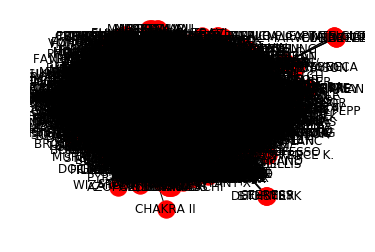

In [50]:
#Example code to draw graph
g=net.Graph()
#g.add_edge('a','b')
#g.add_edge('a','c')
#g.add_edge('b','c')
g = GA_list[0]
layout = net.spring_layout(g)
net.draw_networkx_nodes(g,layout)
net.draw_networkx_labels(g,pos=layout)
net.draw_networkx_edges(g,pos=layout)
plt.axis("off")
plt.show()

In [37]:
dc = net.degree_centrality(GA)
sorted(dc.items(),key=lambda x:x[1],reverse=True)[:5]

[('CAPTAIN AMERICA', 0.2966536964980545),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254)]

As per the *Degree Centrality*, CAPTAIN AMERICA has co-appeared with most of the other MARVEL characters, followed by SPIDER-MAN and IRON MAN.  

In [38]:
cc = net.closeness_centrality(GA)

In [39]:
sorted(cc.items(),key=lambda x:x[1],reverse=True)[:5]

[('CAPTAIN AMERICA', 0.583688144346388),
 ('SPIDER-MAN/PETER PAR', 0.5740902532137266),
 ('IRON MAN/TONY STARK ', 0.5614279813721937),
 ('THING/BENJAMIN J. GR', 0.5577521106953788),
 ('MR. FANTASTIC/REED R', 0.556053126894305)]

The closeness centrality measure also showed the same characters we obtained using Degree Centrality.

In [47]:
print("Average distance to all other characters from CAPTAIN AMERICA is {0} characters".format(1/cc['CAPTAIN AMERICA']))
print("Average distance to all other characters from SPIDER MAN is {0} characters".format(1/cc['SPIDER-MAN/PETER PAR']))
print("Average distance to all other characters from IRON MAN is {0} characters".format(1/cc['IRON MAN/TONY STARK ']))

Average distance to all other characters from CAPTAIN AMERICA is 1.7132436382099152 characters
Average distance to all other characters from SPIDER MAN is 1.7418863922563625 characters
Average distance to all other characters from IRON MAN is 1.7811723554566812 characters


We can note that there is no significant difference of average distances to all other comic characters from CAPTAIN AMERICA, SPIDER MAN and IRON MAN.

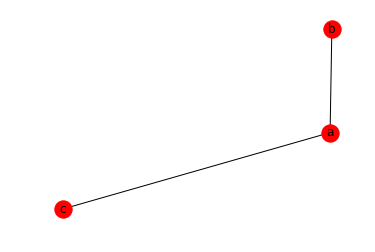

In [48]:
#Example code to draw graph
g=net.Graph()
g.add_edge('a','b')
g.add_edge('a','c')
#g.add_edge('b','c')
layout = net.spring_layout(g)
net.draw_networkx_nodes(g,layout)
net.draw_networkx_labels(g,pos=layout)
net.draw_networkx_edges(g,pos=layout)
plt.axis("off")
plt.show()

In [23]:
print(net.info(g))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
